In [33]:
import csv
import math
import matplotlib.pyplot as plt
from functools import reduce
import random


In [34]:
with open('dados2.csv', 'r') as dados:
    leitura = csv.reader(dados, delimiter=';')
    matriz_dados = [i for i in leitura]
matriz_dados


[['Abaetetuba', '11.44', 'Nordeste Paraense'],
 ['Abel Figueiredo', '7.58', 'Sudeste Paraense'],
 ['Acara', '17.36', 'Nordeste Paraense'],
 ['Afua', '11.85', 'Marajo'],
 ['agua Azul do Norte', '31.11', 'Sudeste Paraense'],
 ['Alenquer', '25.13', 'Baixo Amazonas'],
 ['Almeirim', '25.67', 'Baixo Amazonas'],
 ['Altamira', '14.36', 'Sudoeste Paraense'],
 ['Anajas', '14.49', 'Marajo'],
 ['Ananindeua', '12.56', 'Metropolitana de Belem'],
 ['Anapu', '10.74', 'Sudoeste Paraense'],
 ['Augusto Correa', '14.87', 'Nordeste Paraense'],
 ['Aurora do Para', '4.71', 'Nordeste Paraense'],
 ['Aveiro', '20.69', 'Sudoeste Paraense'],
 ['Bagre', '25.55', 'Marajo'],
 ['Baiao', '27.94', 'Nordeste Paraense'],
 ['Bannach', '0', 'Sudeste Paraense'],
 ['Barcarena', '10.03', 'Metropolitana de Belem'],
 ['Belem', '15.5', 'Metropolitana de Belem'],
 ['Belterra', '19.29', 'Baixo Amazonas'],
 ['Benevides', '14.01', 'Metropolitana de Belem'],
 ['Bom Jesus do Tocantins', '10.27', 'Sudeste Paraense'],
 ['Bonito', '4.76'

In [35]:
numeros = list(map(lambda x:float(x), [valor[1] for valor in matriz_dados]))

#estatistica básicas
def estatisticas_basicas(matriz_numeros):
    media = reduce(lambda x, y: x+y, matriz_numeros)/len(matriz_numeros)
    variancia = reduce(lambda x, y: x+(y-media)**2, matriz_numeros, 0)/len(matriz_numeros)
    desv_padr = math.sqrt(variancia)
    cv = desv_padr/media
    return media, variancia, desv_padr, cv

media_p, variancia_p, desv_padr_p, cv_p = estatisticas_basicas(numeros)
print(f'A média da taxa de homicídios da população é {media_p:.2f}, a variância é {variancia_p:.2f}, o desvio padrão é {desv_padr_p:.2f} e o cv é igual a {cv_p:.2f}')

A média da taxa de homicídios da população é 14.63, a variância é 40.90, o desvio padrão é 6.40 e o cv é igual a 0.44


In [36]:
#criação de funções para calcular valores para classes como amplitude total, numero de classes = k e amplitude da classe = h
#Juntamente a uma função para separar um dicionário para armazenar as classes e amplitudes com suas respectivas frequencias,
#Uma lista contendo as amplitudes de classe, e uma lista com os pontos médios de cada classe

def valores_dist_classe(matriz_numeros):
    at = max(matriz_numeros) - min(matriz_numeros)
    k = int(round(math.sqrt(len(matriz_numeros))))
    h = math.ceil(at/k)
    return k, h


def listas_dict_classes(matriz_numeros):
    classes = {}
    amplitudes = []
    ponto_medio = []
    # recursividade para coletar valores de classe
    k, h = valores_dist_classe(matriz_numeros)
    for i in range(k):
        if len(amplitudes) == 0:
            amplitudes.append(min(matriz_numeros))
        else:
            amplitudes.append(amplitudes[i-1]+h)

    for i in range(len(amplitudes)):
        if i < k-1:
            classes[f'{amplitudes[i]}|---{amplitudes[i+1]}'] = len(
                [x for x in matriz_numeros if x >= amplitudes[i] and x < amplitudes[i+1]])
            ponto_medio.append((amplitudes[i]+amplitudes[i+1])/2)
        else:
            classes[f'{amplitudes[i]}|---{amplitudes[i]+h}'] = len(
                [x for x in matriz_numeros if x >= amplitudes[i] and x < amplitudes[i]+h])
            ponto_medio.append(((amplitudes[i]+(amplitudes[i]+h))/2))
    
    return classes,  ponto_medio

classes_p, ponto_medio_p = listas_dict_classes(numeros)
print(classes_p, ponto_medio_p)

{'0.0|---3.0': 5, '3.0|---6.0': 7, '6.0|---9.0': 16, '9.0|---12.0': 21, '12.0|---15.0': 26, '15.0|---18.0': 27, '18.0|---21.0': 21, '21.0|---24.0': 4, '24.0|---27.0': 13, '27.0|---30.0': 3, '30.0|---33.0': 1, '33.0|---36.0': 0} [1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 28.5, 31.5, 34.5]


In [37]:
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i, j in classes_p.items():
    print(f'{i:^13} | {j:>4}')


   Classes    |  Fi 
--------------|-----
 0.0|---3.0   |    5
 3.0|---6.0   |    7
 6.0|---9.0   |   16
 9.0|---12.0  |   21
12.0|---15.0  |   26
15.0|---18.0  |   27
18.0|---21.0  |   21
21.0|---24.0  |    4
24.0|---27.0  |   13
27.0|---30.0  |    3
30.0|---33.0  |    1
33.0|---36.0  |    0


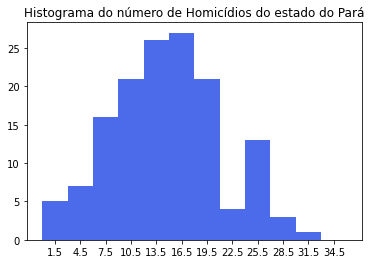

In [38]:
#plotagem do histograma
plt.bar(ponto_medio_p, [t for t in classes_p.values()], 3, color='#4B6BEA')
plt.title('Histograma do número de Homicídios do estado do Pará')
plt.xticks(ponto_medio_p)
plt.show()


In [39]:
#calcular o a quantidade da amostra "n"
n = (math.pow(1.96, 2)*math.pow(variancia_p, 2))/(sum(numeros) *
                                                0.05+math.pow(1.96, 2)*math.pow(variancia_p, 2)/sum(numeros))
n = math.ceil(n)
n


60

# Amostragem Aleatória Simples

In [40]:
with open('dados2.csv', 'r') as arquivo:
    ler = csv.reader(arquivo, delimiter=';')
    populacao = [entrada for entrada in ler]
populacao


[['Abaetetuba', '11.44', 'Nordeste Paraense'],
 ['Abel Figueiredo', '7.58', 'Sudeste Paraense'],
 ['Acara', '17.36', 'Nordeste Paraense'],
 ['Afua', '11.85', 'Marajo'],
 ['agua Azul do Norte', '31.11', 'Sudeste Paraense'],
 ['Alenquer', '25.13', 'Baixo Amazonas'],
 ['Almeirim', '25.67', 'Baixo Amazonas'],
 ['Altamira', '14.36', 'Sudoeste Paraense'],
 ['Anajas', '14.49', 'Marajo'],
 ['Ananindeua', '12.56', 'Metropolitana de Belem'],
 ['Anapu', '10.74', 'Sudoeste Paraense'],
 ['Augusto Correa', '14.87', 'Nordeste Paraense'],
 ['Aurora do Para', '4.71', 'Nordeste Paraense'],
 ['Aveiro', '20.69', 'Sudoeste Paraense'],
 ['Bagre', '25.55', 'Marajo'],
 ['Baiao', '27.94', 'Nordeste Paraense'],
 ['Bannach', '0', 'Sudeste Paraense'],
 ['Barcarena', '10.03', 'Metropolitana de Belem'],
 ['Belem', '15.5', 'Metropolitana de Belem'],
 ['Belterra', '19.29', 'Baixo Amazonas'],
 ['Benevides', '14.01', 'Metropolitana de Belem'],
 ['Bom Jesus do Tocantins', '10.27', 'Sudeste Paraense'],
 ['Bonito', '4.76'

In [41]:
#selecionando a amostra
random.seed(30)
amostra_aas = random.sample(populacao, 60)
amostra_aas


[['Ulianopolis', '15.77', 'Sudeste Paraense'],
 ['Monte Alegre', '16.19', 'Baixo Amazonas'],
 ['Altamira', '14.36', 'Sudoeste Paraense'],
 ['Igarape-Miri', '14', 'Nordeste Paraense'],
 ['Maraba', '15.14', 'Sudeste Paraense'],
 ['Aurora do Para', '4.71', 'Nordeste Paraense'],
 ['Rio Maria', '14.23', 'Sudeste Paraense'],
 ['Porto de Moz', '27.34', 'Baixo Amazonas'],
 ['Capitao Poco', '15.86', 'Nordeste Paraense'],
 ['Benevides', '14.01', 'Metropolitana de Belem'],
 ['Sao Domingos do Capim', '10.75', 'Nordeste Paraense'],
 ['Abel Figueiredo', '7.58', 'Sudeste Paraense'],
 ['Limoeiro do Ajuru', '19.23', 'Nordeste Paraense'],
 ['Almeirim', '25.67', 'Baixo Amazonas'],
 ['Belem', '15.5', 'Metropolitana de Belem'],
 ['Cumaru do Norte', '10', 'Sudeste Paraense'],
 ['Rondon do Para', '7.56', 'Sudeste Paraense'],
 ['Sao Joao do Araguaia', '10.93', 'Sudeste Paraense'],
 ['Santa Barbara do Para', '15.2', 'Metropolitana de Belem'],
 ['Oriximina', '18.08', 'Baixo Amazonas'],
 ['Curuca', '14.6', 'Nord

In [43]:
#adicionando os dados da amostra em um dicionário para verificar quantas quais e quantas mesoregiões fazem parte da amostra
def cont_mesoreg(matriz_amostra):
    mesoregioes_selec = [item[2] for item in matriz_amostra]
    mesoreg = {
        'Baixo Amazonas': mesoregioes_selec_aas.count('Baixo Amazonas'),
        'Marajo':mesoregioes_selec_aas.count('Marajo'),
        'Metropolitana de Belem': mesoregioes_selec.count('Metropolitana de Belem'),
        'Nordeste Paraense': mesoregioes_selec.count('Nordeste Paraense'),
        'Sudoeste Paraense': mesoregioes_selec.count('Sudoeste Paraense'),
        'Sudeste Paraense': mesoregioes_selec.count('Sudeste Paraense'),
    }
    return mesoreg
mesoreg_selec_aas =cont_mesoreg(amostra_aas)
mesoreg_selec_aas


{'Baixo Amazonas': 7,
 'Marajo': 4,
 'Metropolitana de Belem': 8,
 'Nordeste Paraense': 20,
 'Sudoeste Paraense': 5,
 'Sudeste Paraense': 16}

In [44]:
#coletando somente a lista de números da amostra juntamente as estatísticas básicas
numeros_aas = list(map(lambda x:float(x), [item[1] for item in amostra_aas]))

media_aas, variancia_aas, desv_padr_aas, cv_aas = estatisticas_basicas(numeros_aas)
print(f'A média da taxa de homicídios da amostra é {media_aas:.2f}, a variância é {variancia_aas:.2f}, o desvio padrão é {desv_padr_aas:.2f} e o cv é igual a {cv_aas:.2f}')

A média da taxa de homicídios da amostra é 14.20, a variância é 31.44, o desvio padrão é 5.61 e o cv é igual a 0.39


In [45]:
#utilizando a função criada para desenvolver o dicionario com as classes e suas respectivas frequencias e uma lista com os pontos médios
classes_aas, ponto_medio_aas = listas_dict_classes(numeros_aas)

print(classes_aas, ponto_medio_aas)

{'0.0|---4.0': 1, '4.0|---8.0': 8, '8.0|---12.0': 12, '12.0|---16.0': 21, '16.0|---20.0': 11, '20.0|---24.0': 2, '24.0|---28.0': 5, '28.0|---32.0': 0} [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0]


In [46]:
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i, j in classes_aas.items():
    print(f'{i:^13} | {j:>4}')

   Classes    |  Fi 
--------------|-----
 0.0|---4.0   |    1
 4.0|---8.0   |    8
 8.0|---12.0  |   12
12.0|---16.0  |   21
16.0|---20.0  |   11
20.0|---24.0  |    2
24.0|---28.0  |    5
28.0|---32.0  |    0


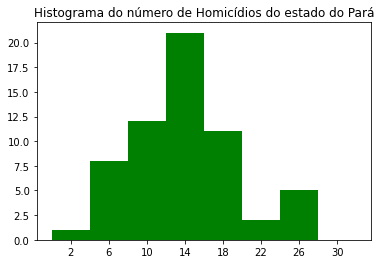

In [47]:
#plotagem do histograma
plt.bar(ponto_medio_aas, [t for t in classes_aas.values()],4, color='green')
plt.title('Histograma do número de Homicídios do estado do Pará')
plt.xticks(ponto_medio_aas)
plt.show()

# Amostragem Sistemática


In [48]:
#utilizando o arquivo .csv com os dados ordenados da menor taxa de homicio para a maior taxa.
with open('dados2_ordenado.csv', 'r') as arquivo:
    ler = csv.reader(arquivo, delimiter =';')
    populacao_ord = [item for item in ler]
populacao_ord

[['Bannach', '0', 'Sudeste Paraense'],
 ['Nova Ipixuna', '0', 'Sudeste Paraense'],
 ['Palestina do Para', '0', 'Sudeste Paraense'],
 ['Santa Luzia do Para', '0', 'Nordeste Paraense'],
 ['Sao Joao da Ponta', '0', 'Nordeste Paraense'],
 ['Terra Santa', '3.22', 'Baixo Amazonas'],
 ['Aurora do Para', '4.71', 'Nordeste Paraense'],
 ['Bonito', '4.76', 'Nordeste Paraense'],
 ['Dom Eliseu', '5.03', 'Sudeste Paraense'],
 ['Primavera', '5.24', 'Nordeste Paraense'],
 ['Terra Alta', '5.49', 'Nordeste Paraense'],
 ['Sao Domingos do Araguaia', '5.68', 'Sudeste Paraense'],
 ['Quatipuru', '6.17', 'Nordeste Paraense'],
 ['Melgaco', '6.36', 'Marajo'],
 ['Ourem', '6.45', 'Nordeste Paraense'],
 ['Bujaru', '6.48', 'Metropolitana de Belem'],
 ['Santana do Araguaia', '6.64', 'Sudeste Paraense'],
 ['Novo Progresso', '6.84', 'Sudoeste Paraense'],
 ['Rondon do Para', '7.56', 'Sudeste Paraense'],
 ['Abel Figueiredo', '7.58', 'Sudeste Paraense'],
 ['Nova Timboteua', '7.63', 'Nordeste Paraense'],
 ['Soure', '7.77'

In [49]:
#calculando o valor de K para verificar a distancia dos intervalos e deciasão do inicio da selação atarvés do r
k_as = round(len(populacao_ord)/n)
r = random.randint(1,k_as)
posicoes_amostras = [r]
for posicao in range(1,n):
    posicoes_amostras.append(r+posicao*k_as)


In [53]:
amostra_as =[]
for seletor in posicoes_amostras:
    amostra_as.append(populacao_ord[seletor])
amostra_as

[['Nova Ipixuna', '0', 'Sudeste Paraense'],
 ['Santa Luzia do Para', '0', 'Nordeste Paraense'],
 ['Terra Santa', '3.22', 'Baixo Amazonas'],
 ['Bonito', '4.76', 'Nordeste Paraense'],
 ['Primavera', '5.24', 'Nordeste Paraense'],
 ['Sao Domingos do Araguaia', '5.68', 'Sudeste Paraense'],
 ['Melgaco', '6.36', 'Marajo'],
 ['Bujaru', '6.48', 'Metropolitana de Belem'],
 ['Novo Progresso', '6.84', 'Sudoeste Paraense'],
 ['Abel Figueiredo', '7.58', 'Sudeste Paraense'],
 ['Soure', '7.77', 'Marajo'],
 ['Garrafao do Norte', '8.23', 'Nordeste Paraense'],
 ['Salinopolis', '8.82', 'Nordeste Paraense'],
 ['Sao Caetano de Odivelas', '8.93', 'Nordeste Paraense'],
 ['Brasil Novo', '9.23', 'Sudoeste Paraense'],
 ['Marapanim', '9.9', 'Nordeste Paraense'],
 ['Cumaru do Norte', '10', 'Sudeste Paraense'],
 ['Castanhal', '10.16', 'Metropolitana de Belem'],
 ['Peixe-Boi', '10.53', 'Nordeste Paraense'],
 ['Sao Domingos do Capim', '10.75', 'Nordeste Paraense'],
 ['Igarape-Acu', '10.77', 'Nordeste Paraense'],
 ['A

In [54]:
mesoreg_select_as =cont_mesoreg(amostra_as)
mesoreg_select_as


{'Baixo Amazonas': 7,
 'Marajo': 4,
 'Metropolitana de Belem': 5,
 'Nordeste Paraense': 20,
 'Sudoeste Paraense': 9,
 'Sudeste Paraense': 16}

In [56]:
#separando os valores numericos da matriz
numeros_as = list(map(lambda x:float(x),[item[1] for item in amostra_as]))
media_as, variancia_as, desv_padr_as, cv_as = estatisticas_basicas(numeros_as)
print(f'A média da taxa de homicídios da amostra é {media_as:.2f}, a variância é {variancia_as:.2f}, o desvio padrão é {desv_padr_as:.2f} e o cv é igual a {cv_as:.2f}')


A média da taxa de homicídios da amostra é 12.74, a variância é 23.64, o desvio padrão é 4.86 e o cv é igual a 0.38


In [59]:
#criação do dicionário para armazenamento das classes e da lista de pontos mádios
classes_as, ponto_medio_as = listas_dict_classes(numeros_as)
print(classes_as, ponto_medio_as)

{'0.0|---3.0': 2, '3.0|---6.0': 4, '6.0|---9.0': 8, '9.0|---12.0': 10, '12.0|---15.0': 13, '15.0|---18.0': 14, '18.0|---21.0': 9, '21.0|---24.0': 0} [1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5]


In [60]:
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i, j in classes_as.items():
    print(f'{i:^13} | {j:>4}')

   Classes    |  Fi 
--------------|-----
 0.0|---3.0   |    2
 3.0|---6.0   |    4
 6.0|---9.0   |    8
 9.0|---12.0  |   10
12.0|---15.0  |   13
15.0|---18.0  |   14
18.0|---21.0  |    9
21.0|---24.0  |    0


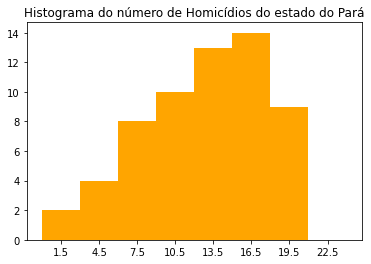

In [61]:
#plotagem do histograma
plt.bar(ponto_medio_as, [t for t in classes_as.values()],3, color='orange')
plt.title('Histograma do número de Homicídios do estado do Pará')
plt.xticks(ponto_medio_as)
plt.show()

# Amostragem Estratificada